In [116]:
import serial
from ctypes import (Union, Array, c_uint8, c_float, cdll, CDLL)
from enum import Enum
import crcmod
import matplotlib.pyplot as plt
import time
import visa
import struct
import numpy as np
class uint8_array(Array):
    _type_ = c_uint8
    _length_ = 4
class f_type(Union):
    _fields_ = ("float", c_float), ("char", uint8_array)

    


In [14]:
class voltageSource(object):
    def __init__(self, com_name):
        self.com_name = com_name
        self.session_open = 0
        self.serial_device = serial.Serial()
        self.serial_device.port = com_name
        self.serial_device.baudrate = 115200
        self.serial_device.timeout = 5
        
        '''
        try:
            self.serial_device = serial.Serial(port = com_name, baudrate = 115200, timeout = 5)
            self.session_open = 1
        except  serial.SerialException:
                print("COM port already initialize")
                
        ''' 
        self.datain_buf = []
        self.dataout_buf = []
    def close(self):
        try:
            self.serial_device.close()
            self.session_open = 0
        except:
            print("close error")
    def open(self):
        if self.session_open == 0:
            try:
                self.serial_device.open()
                self.session_open = 1
            except serial.SerialException:
                print("com port not open")
        else:
            print("device already initialize")
    def write(self, data_bytearray):
        self.serial_device.write(data_bytearray)
    def read(self, bytes_num):
        return (self.serial_device.read(bytes_num))
    
    def float_to4bytes(self, float_data):
        temp_data = f_type()
        temp_data.float = float_data
        return temp_data.char[:]
    def byteArray_toFloat(self, data_array, offset = 0):
        temp_data = f_type()
        temp_data.char[:] = (data_array[0+offset],data_array[1+offset],data_array[2+offset],data_array[3+offset])
        return temp_data.float
    def formated_data(self, data_in):
        return (bytearray(data_in))            

In [123]:
vs = voltageSource("COM5")
vs.open()

In [107]:
data = list()
vs.write([0xa5])
data = vs.read(68)

In [108]:
data_exs = data[2:66]
#vs.byteArray_toFloat(data_exs,60)
#data_exs[]
off = 20
struct.unpack('f', data_exs[0+off:4+off])

(0.3304029405117035,)

In [94]:
vs.byteArray_toFloat(data_exs,20)
voltPos = list()
for i in range(4):
    voltPos.append(vs.byteArray_toFloat(data_exs,0+16*i))
print(voltPos)
voltNeg = list()
for i in range(4):
    voltNeg.append(vs.byteArray_toFloat(data_exs,8+16*i))
print(voltNeg)
currPos = list()
for i in range(4):
    currPos.append(vs.byteArray_toFloat(data_exs,4+16*i))
print(currPos)
currNeg = list()
for i in range(4):
    currNeg.append(vs.byteArray_toFloat(data_exs,12+16*i))
print(currNeg)

[0.560879111289978, 1.1459341049194336, 1.1040292978286743, 1.118534803390503]
[0.24377290904521942, 0.22846154868602753, 0.2220146656036377, 0.22362639009952545]
[10.218315124511719, 0.29816851019859314, 0.35457876324653625, 0.29816851019859314]
[0.7655677795410156, 0.36263737082481384, 0.523809552192688, 0.24175824224948883]


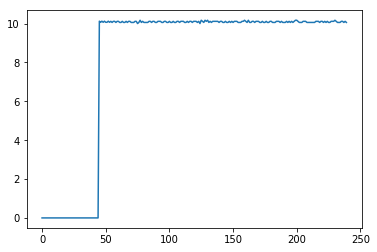

In [124]:

data_array = list()
for i in range(240):
    vs.write([0xa5])
    data = vs.read(86)
    data_exs = data[2:66]
    data_array.append(vs.byteArray_toFloat(data_exs,4))
    #print("{:0.3f}  count - {}".format(data_array[i], i+1))
    time.sleep(1)
plt.plot(data_array)
    
    
    

In [125]:
print((np.max(data_array)- np.min(data_array))/np.mean(data_array))

1.2406403441494374


In [126]:
vs.close()